# Project 3: Recommender System

Andrew Abbott  
MSDS 7331  
April 30, 2017  

## Business Understanding:  
  
The goal of this recommender system is to give quality recommendations for jokes to a user using collaborative filtering in the GraphLab API.

The data comes from the Jester dataset and can be found at the following url:  
http://eigentaste.berkeley.edu/dataset/

Eigentaste: A Constant Time Collaborative Filtering Algorithm. Ken Goldberg, Theresa Roeder, Dhruv Gupta, and Chris Perkins. Information Retrieval, 4(2), 133-151. July 2001.

## Data Understanding:

The dataset used contains over 1.7 million continuous ratings (-10.00 to +10.00) of 150 jokes from 59,132 users: collected between November 2006 - May 2009.

The names have all been removed to protect the users' privacy.

The first step is to import the data set into Python. There are two files. Jester_ratings.dat contains user ID, an ID for the joke, and the user's rating of that joke. Jester_items.dat contains all of the jokes with their assigned item IDs.

In [137]:
# Read ratings data from jester_ratings.dat
import pandas as pd
columns = ['User-ID', 'Item-ID', 'rating']
df = pd.read_table('data/jester_ratings.dat', sep = '\s+', names = columns)
df.head()

,User-ID,Item-ID,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [138]:
# Read joke data from jester_items.dat
import re
with open('data/jester_items.dat','rU') as joke_data:
    joke_set = dict()
    joke_list = joke_data.read().split('\n\n')
    for joke in joke_list[0:150]:
        joke = joke.replace('\n','')
        joke = joke.replace('<p>','')
        result = re.search(r'(\d*?):(.*)', joke)
        joke_set[int(result.group(1))] = result.group(2)
        
df2 = pd.DataFrame([[key,value] for key,value in joke_set.iteritems()],columns=['Item-ID','Joke'])
df2.head()

,Item-ID,Joke
0,1,"A man visits the doctor. The doctor says, &quo..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What&#039;s 200 feet long and has 4 teeth?<...
3,4,Q. What&#039;s the difference between a man an...
4,5,Q. What&#039;s O. J. Simpson&#039;s web addres...


In [60]:
dataframe = pd.merge(df, df2, how = 'left', on = 'Item-ID')
dataframe.head()

,User-ID,Item-ID,rating,Joke
0,1,5,0.219,Q. What&#039;s O. J. Simpson&#039;s web addres...
1,1,7,-9.281,How many feminists does it take to screw in a ...
2,1,8,-9.281,Q. Did you hear about the dyslexic devil worsh...
3,1,13,-6.781,They asked the Japanese visitor if they have e...
4,1,15,0.875,Q: What did the blind person say when given so...


# Collaborative Filtering in Turi (formerly Dato, Formerly GraphLab)

The following processes are manipulated versions of basic tutorials that were previously posted on the Dato website. They have here been based on the notebook provided by Dr. Eric Larsen of SMU.

### The five line recommendation system (user-item)


These 5 lines of code build a recommender system using GraphLab.
The first line imports the GraphLab package. Next the data is loaded into an SFrame and renamed 'data'. The third lines builds a model using the User-ID field naturally as the user_id parameter and the Item-ID field as the item_id parameter, the rating is used as the target parameter. The fourth line saves the top 5 recommendation results for all users and the fifth line saves the model in a directory 'my_model'.

In [32]:
# This is a well known graphlab example that builds a recommendation system in 5 lines of code

import graphlab as gl

data = gl.SFrame(data = dataframe)
model = gl.recommender.create(data, user_id="User-ID", item_id="Item-ID", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")

results.head() # the recommendation output


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Abbott\AppData\Local\Temp\graphlab_server_1493571912.log.0


This non-commercial license of GraphLab Create for academic use is assigned to anabbott@smu.edu and will expire on April 23, 2018.


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1761439 observations with 59132 users and 140 items.

Data prepared in: 1.99435s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 220179 / 1761439 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | 45.5154                                  |

| 2       | 2.08333           | 34.6831                                  |

| 3       | 1.04167           | 19.2191                                  |

| 4       | 0.520833          | 1.46324                                  |

| 5       | 0.260417          | 0.392743                                 |

| 6       | 0.130208          | 0.890784                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.260417          | 0.392743                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 55.1131           | 5.30262               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.07s        | 22.8057           | 4.59536               | 0.260417    |

| 2       | 3.85s        | 12.6744           | 3.49267               | 0.260417    |

| 3       | 5.56s        | 9.46283           | 3.04313               | 0.260417    |

| 4       | 7.20s        | 7.9129            | 2.78992               | 0.260417    |

| 5       | 8.83s        | 7.08276           | 2.64236               | 0.260417    |

| 6       | 10.44s       | 6.61361           | 2.55499               | 0.260417    |

| 7       | 12.06s       | 6.31988           | 2.499                 | 0.260417    |

| 8       | 13.68s       | 6.1176            | 2.45941               | 0.260417    |

| 9       | 15.32s       | 5.96695           | 2.4297                | 0.260417    |

| 10      | 16.91s       | 5.85153           | 2.40672               | 0.260417    |

| 11      | 18.52s       | 5.75931           | 2.38818               | 0.260417    |

| 12      | 20.13s       | 5.68208           | 2.37238               | 0.260417    |

| 13      | 21.71s       | 5.6173            | 2.35923               | 0.260417    |

| 14      | 23.30s       | 5.56002           | 2.34763               | 0.260417    |

| 15      | 24.90s       | 5.51329           | 2.33797               | 0.260417    |

| 16      | 26.47s       | 5.47158           | 2.32928               | 0.260417    |

| 17      | 28.08s       | 5.43411           | 2.32157               | 0.260417    |

| 18      | 29.66s       | 5.40002           | 2.31448               | 0.260417    |

| 19      | 31.24s       | 5.36977           | 2.3081                | 0.260417    |

| 20      | 32.84s       | 5.34142           | 2.30237               | 0.260417    |

| 21      | 34.43s       | 5.31503           | 2.29676               | 0.260417    |

| 22      | 36.02s       | 5.29378           | 2.29222               | 0.260417    |

| 23      | 37.62s       | 5.27015           | 2.28744               | 0.260417    |

| 24      | 39.26s       | 5.25081           | 2.2833                | 0.260417    |

| 25      | 40.94s       | 5.23144           | 2.27908               | 0.260417    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 4.66901

Final training RMSE: 2.1507

recommendations finished on 1000/59132 queries. users per second: 153799

recommendations finished on 2000/59132 queries. users per second: 166625

recommendations finished on 3000/59132 queries. users per second: 166620

recommendations finished on 4000/59132 queries. users per second: 166625

recommendations finished on 5000/59132 queries. users per second: 163891

recommendations finished on 6000/59132 queries. users per second: 159957

recommendations finished on 7000/59132 queries. users per second: 148895

recommendations finished on 8000/59132 queries. users per second: 141555

recommendations finished on 9000/59132 queries. users per second: 143963

recommendations finished on 10000/59132 queries. users per second: 147022

recommendations finished on 11000/59132 queries. users per second: 146630

recommendations finished on 12000/59132 queries. users per second: 147203

recommendations finished on 13000/59132 queries. users per second: 136809

recommendations finished on 14000/59132 queries. users per second: 137897

recommendations finished on 15000/59132 queries. users per second: 138214

recommendations finished on 16000/59132 queries. users per second: 139704

recommendations finished on 17000/59132 queries. users per second: 140461

recommendations finished on 18000/59132 queries. users per second: 140591

recommendations finished on 19000/59132 queries. users per second: 137150

recommendations finished on 20000/59132 queries. users per second: 135560

recommendations finished on 21000/59132 queries. users per second: 136330

recommendations finished on 22000/59132 queries. users per second: 137897

recommendations finished on 23000/59132 queries. users per second: 138938

recommendations finished on 24000/59132 queries. users per second: 140316

recommendations finished on 25000/59132 queries. users per second: 141209

recommendations finished on 26000/59132 queries. users per second: 140128

recommendations finished on 27000/59132 queries. users per second: 136330

recommendations finished on 28000/59132 queries. users per second: 136552

recommendations finished on 29000/59132 queries. users per second: 138390

recommendations finished on 30000/59132 queries. users per second: 139500

recommendations finished on 31000/59132 queries. users per second: 140237

recommendations finished on 32000/59132 queries. users per second: 141245

recommendations finished on 33000/59132 queries. users per second: 142206

recommendations finished on 34000/59132 queries. users per second: 141927

recommendations finished on 35000/59132 queries. users per second: 142531

recommendations finished on 36000/59132 queries. users per second: 140590

recommendations finished on 37000/59132 queries. users per second: 140117

recommendations finished on 38000/59132 queries. users per second: 140967

recommendations finished on 39000/59132 queries. users per second: 142301

recommendations finished on 40000/59132 queries. users per second: 143078

recommendations finished on 41000/59132 queries. users per second: 143824

recommendations finished on 42000/59132 queries. users per second: 144294

recommendations finished on 43000/59132 queries. users per second: 144990

recommendations finished on 44000/59132 queries. users per second: 145179

recommendations finished on 45000/59132 queries. users per second: 145595

recommendations finished on 46000/59132 queries. users per second: 145996

recommendations finished on 47000/59132 queries. users per second: 145026

recommendations finished on 48000/59132 queries. users per second: 144980

recommendations finished on 49000/59132 queries. users per second: 143871

recommendations finished on 50000/59132 queries. users per second: 144265

recommendations finished on 51000/59132 queries. users per second: 144646

recommendations finished on 52000/59132 queries. users per second: 145013

recommendations finished on 53000/59132 queries. users per second: 145569

recommendations finished on 54000/59132 queries. users per second: 145517

recommendations finished on 55000/59132 queries. users per second: 145853

recommendations finished on 56000/59132 queries. users per second: 144109

recommendations finished on 57000/59132 queries. users per second: 142287

recommendations finished on 58000/59132 queries. users per second: 141948

recommendations finished on 59000/59132 queries. users per second: 141622

User-ID,Item-ID,score,rank
1,129,12.2423698522,1
1,56,12.0650347091,2
1,140,11.8414740183,3
1,142,11.0323905565,4
1,145,10.9853043176,5
2,22,1.42551468986,1
2,52,0.684201709204,2
2,60,0.342230788641,3
2,127,-0.283315309114,4
2,82,-0.600371249742,5


In the above model creation, we have found the top five highest ranking jokes for each user. Two users are shown with their corresponding highest ranking recommended joke IDs.
___

How can we measure the quality of this model? We really do not know how good these results are.

## The item-item recommendation system
No let's look at creating the item-item similarity matrix. That is, for each item, what are the top closest items based upon user ratings. The following code uses the 3 most similar items to each item and here I use Pearson similarity based on trial and the fact that the data is relatively dense. Cosine and Jaccard similarity yielded slightly higher RMSE.

In [105]:
# from graphlab.recommender import item_similarity_recommender

item_item = gl.recommender.item_similarity_recommender.create(data, 
                                  user_id="User-ID", 
                                  item_id="Item-ID", 
                                  target="rating",
                                  only_top_k=3,
                                  similarity_type="pearson")

results = item_item.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Warning: Ignoring columns Joke;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1761439 observations with 59132 users and 140 items.

Data prepared in: 1.03777s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.504ms                        | 1.5        |

| 59.019ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 60.02ms                             | 0                | 0               |

| 1.06s                               | 38               | 53              |

| 1.39s                               | 100              | 140             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.48237s

Item-ID,similar,score,rank
5,20,0.192786335945,1
5,43,0.160199642181,2
5,51,0.130829274654,3
7,8,0.355112314224,1
7,15,0.30671608448,2
7,16,0.219020068645,3
8,13,0.359930694103,1
8,7,0.355112314224,2
8,5,0.0332475304604,3
13,8,0.359930694103,1


The item-item matrix is typically a good baseline. Our goal is to recommend jokes to specific users based on their demonstrated preferences which the item-item matrix does not capture.  

In order to test the recommendation quality of our models we also need to perform cross-validation and choose some criteria for comparison. One such measure is Root Mean Squared Error (RMSE). RMSE takes into account the difference between the predicted rating and the actual rating of jokes. RMSE can be calculated in the following ways:

$$RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^N (\hat{y}_i-y_i)^2}$$

Or we can calculate the RMSE for each user, U, in our data:

$$\underbrace{RMSE(U)}_{\text{user=U}}=\sqrt{\frac{1}{|U|}\sum_{u\in U} (\hat{y}_u-y_u)^2}$$

Or we can calculate the RMSE for each item, J, in our data:

$$\underbrace{RMSE(J)}_{\text{item=J}}=\sqrt{\frac{1}{|J|}\sum_{j\in J} (\hat{y}_j-y_j)^2}$$

It's importatn to understand that RMSE(U) and RMSE(J) are arrays of averages, the size of the unique number of users or unique number of items, respectively. 

So let's now create a holdout set and see if we can judge the RMSE on a per-user and per-item basis:

## Triaining and Testing Split:

In [106]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                    user_id="User-ID", item_id="Item-ID",
                                                    max_num_users=100, item_test_proportion=0.2)

Now we can use the training and test sets to evaluate our models. The first results are for the item-item similarity model and include RMSE, Precision, and Recall. We will discuss RMSE first.

In [107]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Item-ID", 
                                  target="rating",
                                  only_top_k=5,
                                  similarity_type="pearson")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Warning: Ignoring columns Joke;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1760844 observations with 59132 users and 140 items.

Data prepared in: 1.03807s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.504ms                        | 3.25       |

| 68.022ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 69.022ms                            | 0                | 0               |

| 1.06s                               | 37.25            | 52              |

| 1.41s                               | 100              | 140             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.51338s


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.344827586207 | 0.0571420771096 |
|   2    | 0.293103448276 | 0.0820033682053 |
|   3    | 0.275862068966 |   0.1124618607  |
|   4    | 0.264367816092 |  0.137966877552 |
|   5    | 0.252873563218 |  0.160185244078 |
|   6    | 0.227969348659 |  0.169192407163 |
|   7    | 0.215106732348 |  0.184559736726 |
|   8    | 0.206896551724 |  0.201528646451 |
|   9    | 0.208173690932 |  0.219821973333 |
|   10   |      0.2       |  0.23138368406  |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 5.05509465404442)

Per User RMSE (best)
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  23821  |   2   | 0.716907286459 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE

These results display quite a bit of information including the overall RMSE. For this model it is 5.055.

In [108]:
print rmse_results.viewkeys()
print rmse_results['rmse_overall']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
5.05509465404


What about The by user RMSE? Ten are shown below, followed by a histogram showing the distribution of the RMSE for users with more than 5 jokes rated. Nothing systematic is apparent.

In [109]:
print rmse_results['rmse_by_user']

+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  61709  |   3   | 6.10651826809  |
|  58409  |   1   |  9.8566073689  |
|  49076  |   30  | 7.59199859168  |
|  57975  |   5   | 2.37633189984  |
|  29556  |   2   | 0.983445879546 |
|   7492  |   2   |  6.6237846066  |
|  55558  |   1   | 7.62924083871  |
|  10802  |   4   | 4.29582786682  |
|  11654  |   3   | 7.36439496636  |
|  30320  |   8   |  4.3287101213  |
+---------+-------+----------------+
[87 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


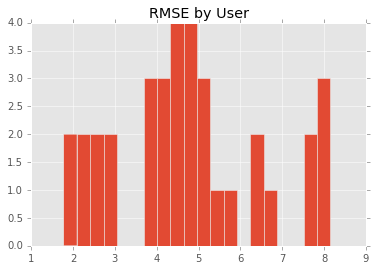

In [110]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>5]

plt.hist(rmsevals, bins = 20)
plt.title('RMSE by User')
plt.show()

Now looking at the item RMSE. These are consistently lower than the by user RMSE with perhaps a better behaved distribution.

In [111]:
print rmse_results['rmse_by_item']

+---------+-------+---------------+
| Item-ID | count |      rmse     |
+---------+-------+---------------+
|   118   |   4   | 4.24583362938 |
|    49   |   4   | 3.91077191967 |
|    13   |   22  | 5.11941309731 |
|    60   |   3   | 7.79080453524 |
|   132   |   7   | 4.34584621474 |
|    36   |   5   | 5.21218847767 |
|   136   |   2   |  7.3111045982 |
|   105   |   7   | 5.70034034587 |
|    24   |   5   | 5.46251132813 |
|    71   |   1   | 6.80014140747 |
+---------+-------+---------------+
[123 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


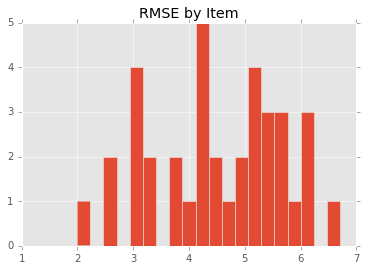

In [112]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_item']['count']>5]

plt.hist(rmsevals, bins = 20)
plt.title('RMSE by Item')
plt.show()

___
Per-user recall and precision are two additional evaluation criteria. Recall and precision are measurements of how well our model predicts what occurs in the test set.

We define the per user measures as follows: Let $p_k$ be a vector of the $k$ highest ranked recommendations for a particular user and let $a$ be the set of all positively ranked items for that user in the test set. 

The per-user-recall for k-items is given by:

$$R(k)=\frac{|a \cap p_k|}{|a|} $$

Which means, intuitively, "of all the items rated positively by the user, how many did your recommender find?"

The per-user-precision for k-items is given by:

$$P(k)=\frac{|a \cap p_k|}{k} $$

Which means, intuitively, "of the k items found by your recommender, how many were rated positively by the user?"

These, like per user RMSE, are arrays the same size as the unique number of users in the dataset.

In [113]:
rmse_results['precision_recall_by_user']

User-ID,cutoff,precision,recall,count
2067,1,0.0,0.0,11
2067,2,0.0,0.0,11
2067,3,0.333333333333,0.0909090909091,11
2067,4,0.25,0.0909090909091,11
2067,5,0.2,0.0909090909091,11
2067,6,0.166666666667,0.0909090909091,11
2067,7,0.142857142857,0.0909090909091,11
2067,8,0.125,0.0909090909091,11
2067,9,0.111111111111,0.0909090909091,11
2067,10,0.1,0.0909090909091,11


For the user shown above, 2067, the highest precision is found with cutoff of 3 while the highest recall is 3 or greater. We want to evaluate the entire model, not just one user at a time. Let's aggregate these scores.

In [116]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

# the groups are not sorted

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.129062380787,0.188257389783,0.474941876104,0.386790913773
2,0.293103448276,0.405080693947,0.0820033682053,0.170684219807
46,0.117486485403,0.182533084985,0.509065979276,0.392103742281
31,0.13644790508,0.191229537095,0.447569829804,0.369337487828
26,0.147214854111,0.198974355831,0.4000910163,0.347935322117
8,0.206896551724,0.261809838618,0.201528646451,0.241118317807
5,0.252873563218,0.309927347979,0.160185244078,0.208834291472
16,0.171695402299,0.221066021713,0.311124797149,0.296709180885
41,0.122342942192,0.183021425664,0.499811183874,0.38798501868
4,0.264367816092,0.331221012263,0.137966877552,0.200411781187


The ghighest precision score shown, 0.29, is with a cut off of only 2, but the standard deviation with a cut off of 2 is a whopping 0.405. Recall appears to increase as the cut off increases. This makes some sense with dense data.  
  
  
Let's try something a little different and look to see if the results get better. Let's start with collaborative filtering to create the user-item matrix. 

___
## Cross Validated Collaborative Filtering

In [117]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Item-ID", 
                                  target="rating")

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1760844 observations with 59132 users and 140 items.

Data prepared in: 2.15453s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 220105 / 1760844 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | 46.3202                                  |

| 2       | 2.08333           | 34.0202                                  |

| 3       | 1.04167           | 19.394                                   |

| 4       | 0.520833          | 1.46589                                  |

| 5       | 0.260417          | 0.391053                                 |

| 6       | 0.130208          | 0.871224                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.260417          | 0.391053                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 55.1112           | 5.30253               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.09s        | 22.8411           | 4.59672               | 0.260417    |

| 2       | 3.85s        | 12.7254           | 3.49698               | 0.260417    |

| 3       | 5.53s        | 9.5367            | 3.05355               | 0.260417    |

| 4       | 7.18s        | 7.96183           | 2.79698               | 0.260417    |

| 5       | 8.93s        | 7.12321           | 2.64892               | 0.260417    |

| 6       | 10.75s       | 6.64067           | 2.55952               | 0.260417    |

| 7       | 12.49s       | 6.33308           | 2.50083               | 0.260417    |

| 8       | 14.17s       | 6.12101           | 2.45964               | 0.260417    |

| 9       | 15.97s       | 5.96692           | 2.42942               | 0.260417    |

| 10      | 17.66s       | 5.84766           | 2.40546               | 0.260417    |

| 11      | 19.29s       | 5.75109           | 2.38615               | 0.260417    |

| 12      | 21.09s       | 5.67111           | 2.36986               | 0.260417    |

| 13      | 22.75s       | 5.60727           | 2.35688               | 0.260417    |

| 14      | 24.47s       | 5.54803           | 2.345                 | 0.260417    |

| 15      | 26.20s       | 5.50068           | 2.3351                | 0.260417    |

| 16      | 27.95s       | 5.45662           | 2.326                 | 0.260417    |

| 17      | 29.65s       | 5.41689           | 2.3179                | 0.260417    |

| 18      | 31.49s       | 5.38363           | 2.31096               | 0.260417    |

| 19      | 33.20s       | 5.35353           | 2.30464               | 0.260417    |

| 20      | 34.87s       | 5.32482           | 2.29862               | 0.260417    |

| 21      | 36.54s       | 5.29997           | 2.29343               | 0.260417    |

| 22      | 38.20s       | 5.27674           | 2.28853               | 0.260417    |

| 23      | 39.83s       | 5.25473           | 2.28383               | 0.260417    |

| 24      | 41.43s       | 5.23495           | 2.27974               | 0.260417    |

| 25      | 43.13s       | 5.2156            | 2.2757                | 0.260417    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 4.67166

Final training RMSE: 2.15132


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.310344827586 | 0.0648359285965 |
|   2    | 0.287356321839 |  0.113342720174 |
|   3    | 0.264367816092 |  0.162150551708 |
|   4    | 0.244252873563 |  0.192812363659 |
|   5    | 0.232183908046 |  0.217658485572 |
|   6    | 0.227969348659 |  0.245347908057 |
|   7    | 0.218390804598 |  0.257904557822 |
|   8    | 0.212643678161 |  0.274349757541 |
|   9    | 0.201787994891 |  0.280242062711 |
|   10   |      0.2       |  0.297205498982 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 5.042141942719785)

Per User RMSE (best)
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  13963  |   1   | 0.178281588351 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMS

In [118]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.129700950391,0.186538680189,0.545421137435,0.370284287545
2,0.287356321839,0.391226952302,0.113342720174,0.235898712745
46,0.120984736277,0.183666736963,0.594116112939,0.373442649195
31,0.13681868743,0.189613033374,0.514779566686,0.35838740929
26,0.146330680813,0.202752524074,0.474357881184,0.337401150634
8,0.212643678161,0.265412105373,0.274349757541,0.312921339156
5,0.232183908046,0.293803536231,0.217658485572,0.314955997283
16,0.169540229885,0.228985308197,0.371794108958,0.326824853418
41,0.12458572324,0.184787658707,0.570030421297,0.367958902495
4,0.244252873563,0.319340671996,0.192812363659,0.314216777853


That is very similar results to the item-item model. The recall looks to be consistently higher.
___
We can possibly improve the performance of the ranking factor recommender model by tweaking the parameters.

In [119]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Item-ID", 
                                  target="rating",
                                  num_factors=16,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1760844 observations with 59132 users and 140 items.

Data prepared in: 2.045s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 220105 / 1760844 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00418442        | 51.7322                                  |

| 1       | 0.00209221        | 52.9509                                  |

| 2       | 0.00104611        | 53.8623                                  |

| 3       | 0.000523053       | 54.4395                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00418442        | 51.7322                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 55.1113           | 5.30253               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.56s        | 46.2945           | 5.26613               | 0.00418442  |

| 2       | 3.07s        | 45.6061           | 5.24127               | 0.00418442  |

| 3       | 6.31s        | 44.287            | 5.19664               | 0.00418442  |

| 4       | 7.70s        | 43.5241           | 5.17626               | 0.00418442  |

| 5       | 9.10s        | 43.0104           | 5.16584               | 0.00418442  |

| 6       | 10.59s       | 42.6349           | 5.15991               | 0.00418442  |

| 7       | 12.07s       | 42.342            | 5.15676               | 0.00418442  |

| 8       | 13.47s       | 42.1055           | 5.15465               | 0.00418442  |

| 9       | 15.28s       | 41.9058           | 5.15362               | 0.00418442  |

| 10      | 16.76s       | 41.7359           | 5.15286               | 0.00418442  |

| 11      | 18.24s       | 41.587            | 5.15224               | 0.00418442  |

| 12      | 19.64s       | 41.4552           | 5.15181               | 0.00418442  |

| 13      | 21.06s       | 41.3362           | 5.15137               | 0.00418442  |

| 14      | 22.46s       | 41.2279           | 5.15146               | 0.00418442  |

| 15      | 23.86s       | 41.1272           | 5.15078               | 0.00418442  |

| 16      | 25.27s       | 41.0364           | 5.15046               | 0.00418442  |

| 17      | 26.70s       | 40.9497           | 5.15023               | 0.00418442  |

| 18      | 28.11s       | 40.8705           | 5.14961               | 0.00418442  |

| 19      | 29.52s       | 40.7967           | 5.14948               | 0.00418442  |

| 20      | 30.95s       | 40.7247           | 5.14924               | 0.00418442  |

| 21      | 32.36s       | 40.6559           | 5.14864               | 0.00418442  |

| 22      | 33.78s       | 40.5914           | 5.14837               | 0.00418442  |

| 23      | 35.19s       | 40.5297           | 5.14795               | 0.00418442  |

| 24      | 36.61s       | 40.4715           | 5.14754               | 0.00418442  |

| 25      | 38.02s       | 40.4143           | 5.14707               | 0.00418442  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 46.4115

Final training RMSE: 5.14561


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.298850574713 | 0.0390696450716 |
|   2    | 0.316091954023 | 0.0768028551862 |
|   3    | 0.35632183908  |  0.165038627872 |
|   4    | 0.330459770115 |  0.205835720908 |
|   5    | 0.314942528736 |  0.234360259745 |
|   6    | 0.298850574713 |  0.260405482684 |
|   7    | 0.293924466338 |  0.294459778288 |
|   8    | 0.281609195402 |  0.316522648969 |
|   9    | 0.278416347382 |  0.353569099289 |
|   10   | 0.275862068966 |  0.396587502305 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 5.228888965867868)

Per User RMSE (best)
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  13963  |   1   | 0.316616630053 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMS

# Is this better than the item item matrix?  

How did it do?

In [120]:
comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.344827586207 | 0.0571420771096 |
|   2    | 0.293103448276 | 0.0820033682053 |
|   3    | 0.275862068966 |   0.1124618607  |
|   4    | 0.264367816092 |  0.137966877552 |
|   5    | 0.252873563218 |  0.160185244078 |
|   6    | 0.227969348659 |  0.169192407163 |
|   7    | 0.215106732348 |  0.184559736726 |
|   8    | 0.206896551724 |  0.201528646451 |
|   9    | 0.208173690932 |  0.219821973333 |
|   10   |      0.2       |  0.23138368406  |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 5.05509465404442)

Per User RMSE (best)
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  23821  |   2   | 0.716907286459 |
+---------+-------+----------------+
[1 rows 

The item-item model still shows a bit lower RMSE, 5.055 compared to 5.23

In [121]:
 comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.344827586207 | 0.0571420771096 |
|   2    | 0.293103448276 | 0.0820033682053 |
|   3    | 0.275862068966 |   0.1124618607  |
|   4    | 0.264367816092 |  0.137966877552 |
|   5    | 0.252873563218 |  0.160185244078 |
|   6    | 0.227969348659 |  0.169192407163 |
|   7    | 0.215106732348 |  0.184559736726 |
|   8    | 0.206896551724 |  0.201528646451 |
|   9    | 0.208173690932 |  0.219821973333 |
|   10   |      0.2       |  0.23138368406  |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.298850574713 | 0.0390696

This would be easier to see graphed visually.

In [122]:
gl.show_comparison(comparisonstruct,[item_item, rec1])

Our ranking factorization recommender with tweaked parameters does appear to outperform the item-item model with cutoff higher than 1.

## Parameters, Parameters
Because there are so many parameters to search through here we will use GraphLab's built in gris search functionality. We will vary the number of factor to find the best set of parameters.

In [123]:
params = {'user_id': 'User-ID', 
          'item_id': 'Item-ID', 
          'target': 'rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

# also note thatthis evaluator also supports sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html?highlight=model_parameter_search

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Apr-30-2017-17-29-4800000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Apr-30-2017-17-29-4800000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Apr-30-2017-17-29-4800000' already exists. Renaming the job to 'Model-Parameter-Search-Apr-30-2017-17-29-4800000-97148'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Apr-30-2017-17-29-4800000-97148' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Apr-30-2017-17-29-4800000-97148' scheduled.


In [131]:
job.get_status()

{'Canceled': 0, 'Completed': 5, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [132]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,Item-ID,0.001,25,24,4,0.5
0,Item-ID,0.001,25,8,4,0.1
3,Item-ID,0.001,50,24,4,0.5
2,Item-ID,0.001,25,24,4,0.25
4,Item-ID,0.001,25,8,8,0.25
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,rating,User-ID,0.437583711019,0.165228887016,4.16672094669,0.124137931034
0.001,rating,User-ID,0.414039775418,0.071922649557,4.56316349042,0.234482758621
0.001,rating,User-ID,0.493282824866,0.185913556483,4.01043607839,0.144827586207
0.001,rating,User-ID,0.464770344314,0.13396264463,4.22484441302,0.188505747126


In [133]:
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'Item-ID',
 'linear_regularization': 0.001,
 'max_iterations': 50,
 'num_factors': 24,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.5,
 'regularization': 0.001,
 'target': 'rating',
 'user_id': 'User-ID'}

In [134]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : User-ID
 Item ID                          : Item-ID
 Target                           : rating
 Additional observation features  : 1
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 1760844
 Number of users                  : 59132
 Number of items                  : 140
 
 Training summary
 ----------------
 Training time                    : 32.5761
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 8
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 25
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 

In [135]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.287356321839 | 0.0390081859022 |
|   2    | 0.247126436782 | 0.0619016117242 |
|   3    | 0.226053639847 | 0.0768995805128 |
|   4    | 0.238505747126 |  0.108708689186 |
|   5    | 0.234482758621 |  0.125619968996 |
|   6    | 0.231800766284 |  0.145024068053 |
|   7    | 0.220032840722 |  0.160272488816 |
|   8    | 0.224137931034 |  0.184744093802 |
|   9    | 0.220945083014 |  0.203746806251 |
|   10   | 0.225287356322 |  0.233773310555 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.172413793103 | 0.071

This fascinating graph shows the performance of each of the tested models. Models 1 - 4 sort of behave similarly converging together. Model 0 really stands out with higher cut offs. Looking closer at Model 0 below:

In [136]:
models[0]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : User-ID
Item ID                          : Item-ID
Target                           : rating
Additional observation features  : 1
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1760844
Number of users                  : 59132
Number of items                  : 140

Training summary
----------------
Training time                    : 32.5761

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 8
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 25

Regularization Settings
-----------------------
regularization                   : 0.001
regularization_type              : 

## Deployment:  

This model may be deployed to provide recommendations to users for jokes that they have not yet ranked. As users rank more jokes the model may be retrained to take into account the new information to provide a better recommender and to prevent recommendations of already rated jokes.

In [147]:
deploy = models[0].recommend(users=[1], k=5)
deploydf = deploy.to_dataframe()
deployframe = pd.merge(deploydf, df2, how = 'left', on = 'Item-ID')
deployframe

,User-ID,Item-ID,score,rank,Joke
0,1,129,2.701519,1,A group of girlfriends is on vacation when the...
1,1,114,2.670602,2,Sherlock Holmes and Dr. Watson go on a camping...
2,1,117,2.615035,3,A man joins a big corporate empire as a traine...
3,1,150,2.563719,4,"In an interview with David Letterman, Carter p..."
4,1,126,2.535642,5,"A Briton, a Frenchman and a Russian are viewin..."
